<a href="https://colab.research.google.com/github/siddharthiitian/stop-sign-detection-using-yolov5/blob/main/Stop_Sign_detection-using_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d andrewmvd/road-sign-detection
!unzip road-sign-detection.zip -d data
!mv ./data/annotations ./data/labels

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 
!pip install -r ./yolov5/requirements.txt

In [ ]:
from preprocessing import convert_voc_to_yolo

In [ ]:
convert_voc_to_yolo()

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

In [ ]:
%%bash
cp yolov5/data/VOC.yaml yolov5/VOC.yaml

In [ ]:
!python ./yolov5/train.py --img 320 --batch 16 --epochs 1 --data VOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tr

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-3 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


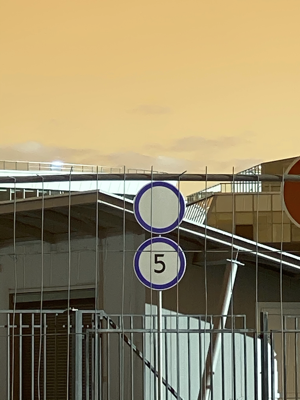

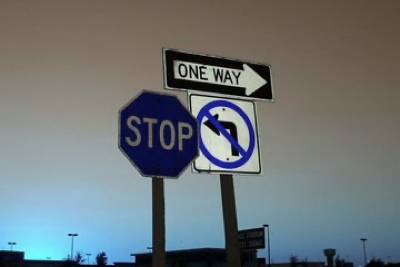

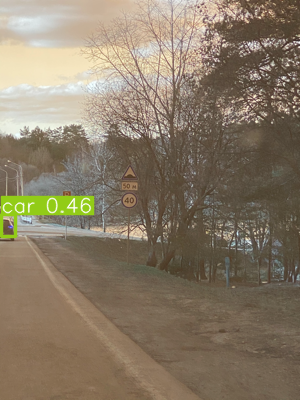

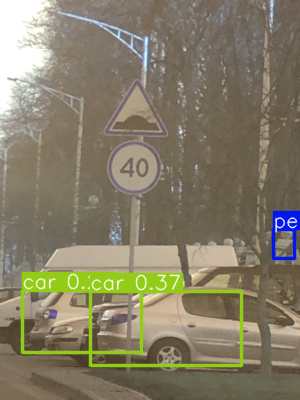

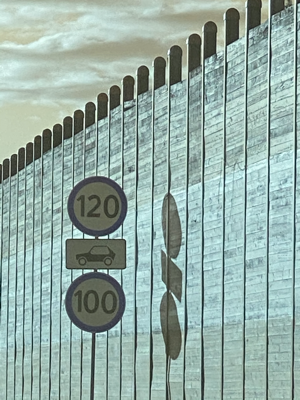

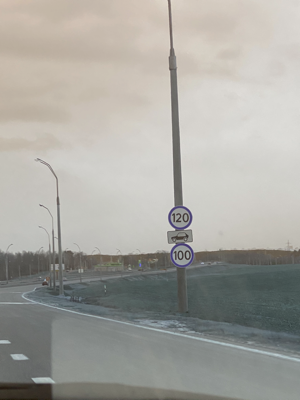

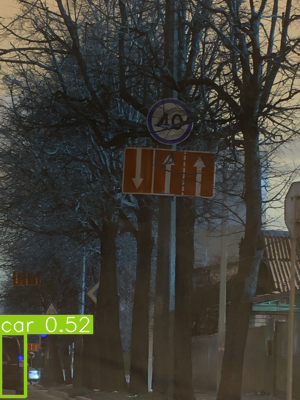

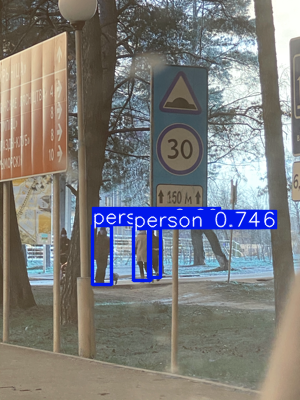

In [ ]:
from google.colab.patches import cv2_imshow
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('./data/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/images/{imgname}')
    results = model(img)
    cv2_imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git add README.md

fatal: pathspec 'README.md' did not match any files
